In [6]:
!pip install datascience

In [7]:
import numpy as np
from nltk.corpus import stopwords
from datascience import *
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
pandas_table = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines= True)
articles = Table.from_df(pandas_table)
articles = articles.with_column('length', articles.apply(len, 'headline'))
headlines = articles.column('headline')

ValueError: Expected object or value

In [4]:
word_count = [len(headline.split()) for headline in headlines]
articles = articles.with_column('word count',word_count)
articles

is_sarcastic,headline,article_link,length,word count
1,thirtysomething scientists unveil doomsday clock of hair ...,https://www.theonion.com/thirtysomething-scientists-unve ...,61,8
0,dem rep. totally nails why congress is falling short on ...,https://www.huffingtonpost.com/entry/donna-edwards-inequ ...,79,13
0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9- ...,49,7
1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-li ...,52,8
1,mother comes pretty close to using word 'streaming' corr ...,https://www.theonion.com/mother-comes-pretty-close-to-us ...,61,9
0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-inheritanc ...,20,3
0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to-file-your ...,42,9
1,richard branson's global-warming donation nearly as much ...,https://www.theonion.com/richard-bransons-global-warming ...,88,13
1,shadow government getting too large to meet in marriott ...,https://politics.theonion.com/shadow-government-getting- ...,73,12
0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6IXxhm,34,6


In [5]:
## Subset of articles table where all rows are sarcastic

sarcasm = articles.where('is_sarcastic', 1)
sarcasm

is_sarcastic,headline,article_link,length,word count
1,thirtysomething scientists unveil doomsday clock of hair ...,https://www.theonion.com/thirtysomething-scientists-unve ...,61,8
1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-li ...,52,8
1,mother comes pretty close to using word 'streaming' corr ...,https://www.theonion.com/mother-comes-pretty-close-to-us ...,61,9
1,richard branson's global-warming donation nearly as much ...,https://www.theonion.com/richard-bransons-global-warming ...,88,13
1,shadow government getting too large to meet in marriott ...,https://politics.theonion.com/shadow-government-getting- ...,73,12
1,ford develops new suv that runs purely on gasoline,https://www.theonion.com/ford-develops-new-suv-that-runs ...,50,9
1,area boy enters jumping-and-touching-tops-of-doorways phase,https://www.theonion.com/area-boy-enters-jumping-and-tou ...,59,5
1,area man does most of his traveling by gurney,https://local.theonion.com/area-man-does-most-of-his-tra ...,45,9
1,guard in video game under strict orders to repeatedly pa ...,https://www.theonion.com/guard-in-video-game-under-stric ...,82,14
1,secret service agent not so secret about being david ala ...,https://www.theonion.com/secret-service-agent-not-so-sec ...,67,12


In [6]:
## Subset of articles table where all rows are NOT sarcastic

not_sarcasm = articles.where('is_sarcastic', 0).drop('is_sarcastic')
not_sarcasm

headline,article_link,length,word count
dem rep. totally nails why congress is falling short on ...,https://www.huffingtonpost.com/entry/donna-edwards-inequ ...,79,13
eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9- ...,49,7
my white inheritance,https://www.huffingtonpost.com/entry/my-white-inheritanc ...,20,3
5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to-file-your ...,42,9
lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6IXxhm,34,6
this lesbian is considered a father in indiana (and an a ...,https://www.huffingtonpost.com/entry/this-lesbian-is-con ...,75,14
amanda peet told her daughter sex is 'a special hug',https://www.huffingtonpost.com/entry/amanda-peet-told-he ...,52,10
what to know regarding current treatments for ebola,https://www.huffingtonpost.com/entry/what-to-know-regard ...,51,8
chris christie suggests hillary clinton was to blame for ...,https://www.huffingtonpost.com/entry/chris-christie-hill ...,107,16
uber ceo travis kalanick stepping down from trump econom ...,https://www.huffingtonpost.com/entry/uber-ceo-travis-kal ...,75,11


## List of Sarcastic / Non-Sarcastic Words

In [7]:
words = []

for i in articles.column('headline'):
    for j in i.split():
        words.append(j)
        
words 

['thirtysomething',
 'scientists',
 'unveil',
 'doomsday',
 'clock',
 'of',
 'hair',
 'loss',
 'dem',
 'rep.',
 'totally',
 'nails',
 'why',
 'congress',
 'is',
 'falling',
 'short',
 'on',
 'gender,',
 'racial',
 'equality',
 'eat',
 'your',
 'veggies:',
 '9',
 'deliciously',
 'different',
 'recipes',
 'inclement',
 'weather',
 'prevents',
 'liar',
 'from',
 'getting',
 'to',
 'work',
 'mother',
 'comes',
 'pretty',
 'close',
 'to',
 'using',
 'word',
 "'streaming'",
 'correctly',
 'my',
 'white',
 'inheritance',
 '5',
 'ways',
 'to',
 'file',
 'your',
 'taxes',
 'with',
 'less',
 'stress',
 'richard',
 "branson's",
 'global-warming',
 'donation',
 'nearly',
 'as',
 'much',
 'as',
 'cost',
 'of',
 'failed',
 'balloon',
 'trips',
 'shadow',
 'government',
 'getting',
 'too',
 'large',
 'to',
 'meet',
 'in',
 'marriott',
 'conference',
 'room',
 'b',
 'lots',
 'of',
 'parents',
 'know',
 'this',
 'scenario',
 'this',
 'lesbian',
 'is',
 'considered',
 'a',
 'father',
 'in',
 'indiana',


In [8]:
sarcastic_words = []

for i in sarcasm.column('headline'):
    for j in i.split():
        sarcastic_words.append(j)
        
sarcastic_words

['thirtysomething',
 'scientists',
 'unveil',
 'doomsday',
 'clock',
 'of',
 'hair',
 'loss',
 'inclement',
 'weather',
 'prevents',
 'liar',
 'from',
 'getting',
 'to',
 'work',
 'mother',
 'comes',
 'pretty',
 'close',
 'to',
 'using',
 'word',
 "'streaming'",
 'correctly',
 'richard',
 "branson's",
 'global-warming',
 'donation',
 'nearly',
 'as',
 'much',
 'as',
 'cost',
 'of',
 'failed',
 'balloon',
 'trips',
 'shadow',
 'government',
 'getting',
 'too',
 'large',
 'to',
 'meet',
 'in',
 'marriott',
 'conference',
 'room',
 'b',
 'ford',
 'develops',
 'new',
 'suv',
 'that',
 'runs',
 'purely',
 'on',
 'gasoline',
 'area',
 'boy',
 'enters',
 'jumping-and-touching-tops-of-doorways',
 'phase',
 'area',
 'man',
 'does',
 'most',
 'of',
 'his',
 'traveling',
 'by',
 'gurney',
 'guard',
 'in',
 'video',
 'game',
 'under',
 'strict',
 'orders',
 'to',
 'repeatedly',
 'pace',
 'same',
 'stretch',
 'of',
 'hallway',
 'secret',
 'service',
 'agent',
 'not',
 'so',
 'secret',
 'about',
 'b

In [19]:
useless_words = make_array('to','of','in','for','on','man','with','new','by','the')
sarcasm_words_tbl = Table().with_column('Words', sarcastic_words)
sarcasm_words_sorted = sarcasm_words_tbl.group('Words').sort('count', descending = True)
sarcasm_words_sorted

Words,count
to,4980
of,3790
in,2104
for,1736
on,1286
man,1143
with,1008
new,973
by,730
the,688


In [10]:
non_sarcastic_words = []

for i in not_sarcasm.column('headline'):
    for j in i.split():
        non_sarcastic_words.append(j)
        
non_sarcastic_words

['dem',
 'rep.',
 'totally',
 'nails',
 'why',
 'congress',
 'is',
 'falling',
 'short',
 'on',
 'gender,',
 'racial',
 'equality',
 'eat',
 'your',
 'veggies:',
 '9',
 'deliciously',
 'different',
 'recipes',
 'my',
 'white',
 'inheritance',
 '5',
 'ways',
 'to',
 'file',
 'your',
 'taxes',
 'with',
 'less',
 'stress',
 'lots',
 'of',
 'parents',
 'know',
 'this',
 'scenario',
 'this',
 'lesbian',
 'is',
 'considered',
 'a',
 'father',
 'in',
 'indiana',
 '(and',
 'an',
 'amazing',
 'one',
 'at',
 'that)',
 'amanda',
 'peet',
 'told',
 'her',
 'daughter',
 'sex',
 'is',
 "'a",
 'special',
 "hug'",
 'what',
 'to',
 'know',
 'regarding',
 'current',
 'treatments',
 'for',
 'ebola',
 'chris',
 'christie',
 'suggests',
 'hillary',
 'clinton',
 'was',
 'to',
 'blame',
 'for',
 'boko',
 "haram's",
 'kidnapping',
 'of',
 'hundreds',
 'of',
 'schoolgirls',
 'uber',
 'ceo',
 'travis',
 'kalanick',
 'stepping',
 'down',
 'from',
 'trump',
 'economic',
 'advisory',
 'council',
 'leave',
 'no',
 

In [11]:
non_sarcasm_words_tbl = Table().with_column('Words', non_sarcastic_words)
non_sarcasm_words_sorted = non_sarcasm_words_tbl.group('Words').sort('count', descending = True)
non_sarcasm_words_sorted.take(np.arange(10,25021,1))

Words,count
with,943
you,732
this,690
new,664
from,661
at,644
about,644
how,639
your,575
are,555


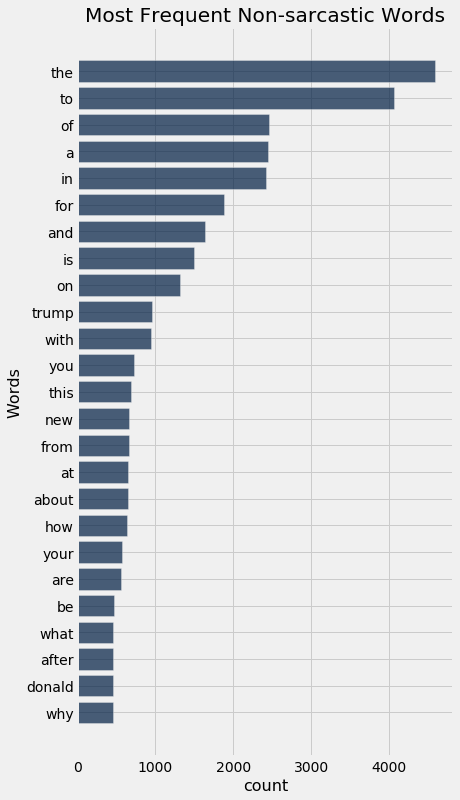

In [12]:
top_25_words = non_sarcasm_words_sorted.take(np.arange(25))
top_25_words.barh('Words')
plt.title('Most Frequent Non-sarcastic Words');

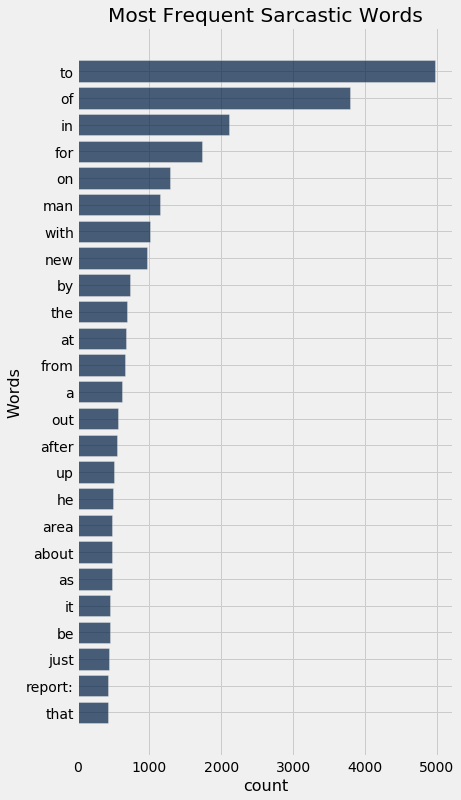

In [13]:
top_25_words = sarcasm_words_sorted.take(np.arange(25))
top_25_words.barh('Words')
plt.title('Most Frequent Sarcastic Words');

In [14]:
make_array(sarcastic_words)

array([['thirtysomething', 'scientists', 'unveil', ..., 'a', 'food',
        'stop']], dtype='<U56')

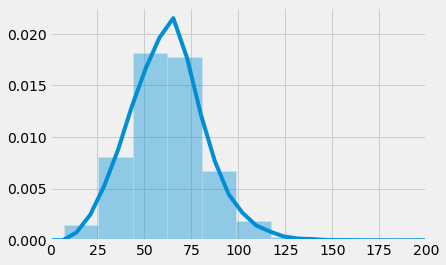

In [26]:
sns.distplot(articles.column('length'))
plt.xlim(0,200);


## Headline Word Count

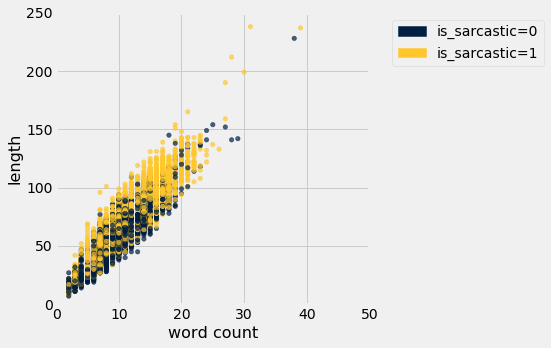

In [23]:
articles.scatter('word count','length', colors = 'is_sarcastic')
plt.xlim(0,50);
plt.ylim(0,250);

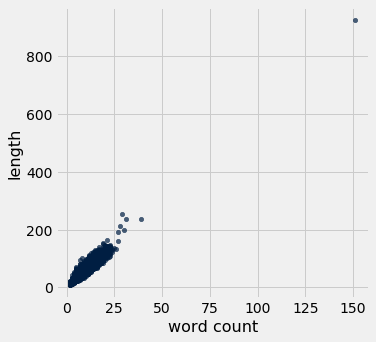

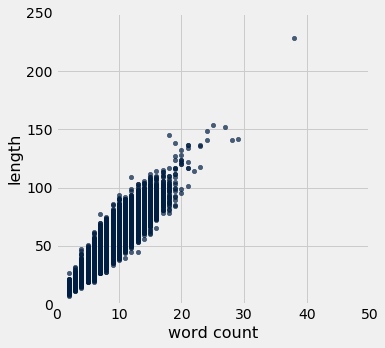

In [52]:
sarcasm.scatter('word count','length')
not_sarcasm.scatter('word count','length')
plt.xlim(0,50);
plt.ylim(0,250);

In [27]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

In [29]:
x_wc = articles.column('word count')
y_wc = articles.column('length')

In [33]:
word_count_su = standard_units(x)
length_su = standard_units(y)

In [38]:
articles_with_su = articles.with_columns(
    'length standardized', length_su,
    'word count standardized',word_count_su
)

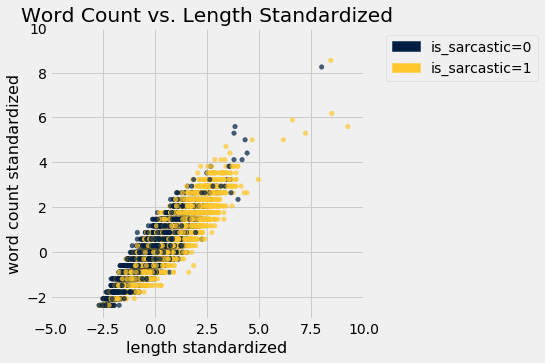

In [48]:
articles_with_su.scatter('length standardized','word count standardized', colors = 'is_sarcastic')
plt.xlim(-5,10);
plt.ylim(-3,10);
plt.title('Word Count vs. Length Standardized');

In [46]:
r = np.mean(word_count_su * length_su)
r

0.9114416900717603

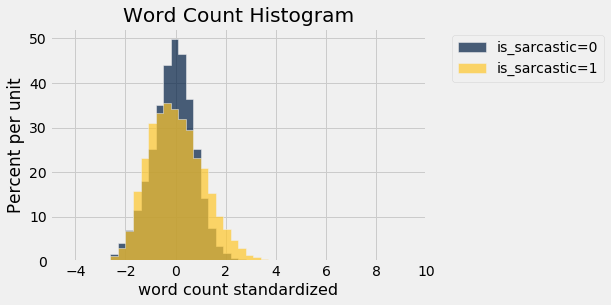

In [70]:
articles_with_su.hist('word count standardized', group = 'is_sarcastic', bins = np.arange(-5,10,0.3) )
plt.title('Word Count Histogram');
plt.xlim(-5,10);

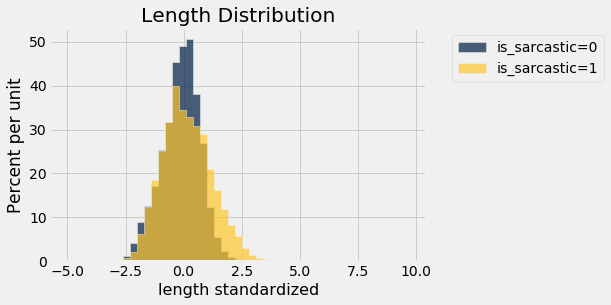

In [73]:
articles_with_su.hist('length standardized', group = 'is_sarcastic',bins = np.arange(-5,10,0.3))
plt.title('Length Distribution');